In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
"""
outputted:

Loaded 81460 rows and 35 columns from accepted_loans_ml_training
Label distribution (is_default):
is_default
0    71365
1    10095
Name: count, dtype: int64 

Numeric features: ['loan_amnt', 'funded_amnt', 'term_months', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'total_acc', 'revol_bal', 'revol_util', 'pub_rec_bankruptcies']
Categorical features: ['purpose', 'application_type', 'activity_year', 'action_taken', 'preapproval', 'loan_to_value_ratio', 'total_loan_costs', 'derived_loan_product_type', 'loan_purpose', 'home_ownership', 'verification_status', 'income', 'debt_to_income_ratio', 'applicant_credit_score_type', 'co_applicant_credit_score_type']
Train size: (65168, 31)
Test size: (16292, 31)

=== Training model ===
Training complete.

=== Evaluation on TEST set ===

Classification report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     14273
           1       0.57      0.00      0.00      2019

    accuracy                           0.88     16292
   macro avg       0.72      0.50      0.47     16292
weighted avg       0.84      0.88      0.82     16292

Confusion matrix (rows=true, cols=pred):
[[14270     3]
 [ 2015     4]]

y = df["is_default"] -> Dependent variable
X = df.drop(columns=["is_default", "loan_id", "borrower_id", "loan_status"]) -> Independent variables
    -> Note these columns are dropped since they are used to identify entries, DO NOT have impact on actual data processing

"""

In [2]:
from sqlalchemy import create_engine
import numpy as np

def load_training_data(db_url = "postgresql+psycopg2:///credit_risk", NAME = str) -> pd.DataFrame:
    engine = create_engine(db_url)
    df = pd.read_sql(f"SELECT * FROM {NAME}", engine)

    print(f"Loaded {df.shape[0]} rows and {df.shape[1]} columns from {NAME}")
    return df


In [3]:
accepted_loans = load_training_data(NAME="accepted_loans")
accepted_loans.dtypes

Loaded 281877 rows and 20 columns from accepted_loans


loan_id                                    int64
borrower_id                                int64
loan_amnt                                float64
funded_amnt                              float64
term_months                                int64
int_rate                                 float64
installment                              float64
income                                   float64
dti                                      float64
loan_status                               object
purpose                                   object
application_type                          object
activity_year                            float64
action_taken                             float64
preapproval                              float64
loan_to_value_ratio                      float64
total_loan_costs                          object
derived_loan_product_type                 object
loan_purpose                              object
created_at                   datetime64[ns, UTC]
dtype: object

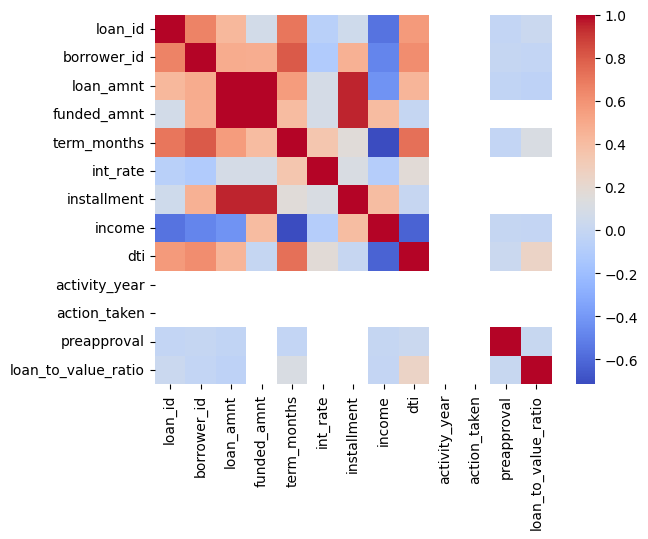

In [4]:
import seaborn as sns

numeric_cols = accepted_loans.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), cmap='coolwarm', annot=False)
plt.show()

#Shows the relationship and how strong 2 particular values have (red means pos relation, blue means neg)

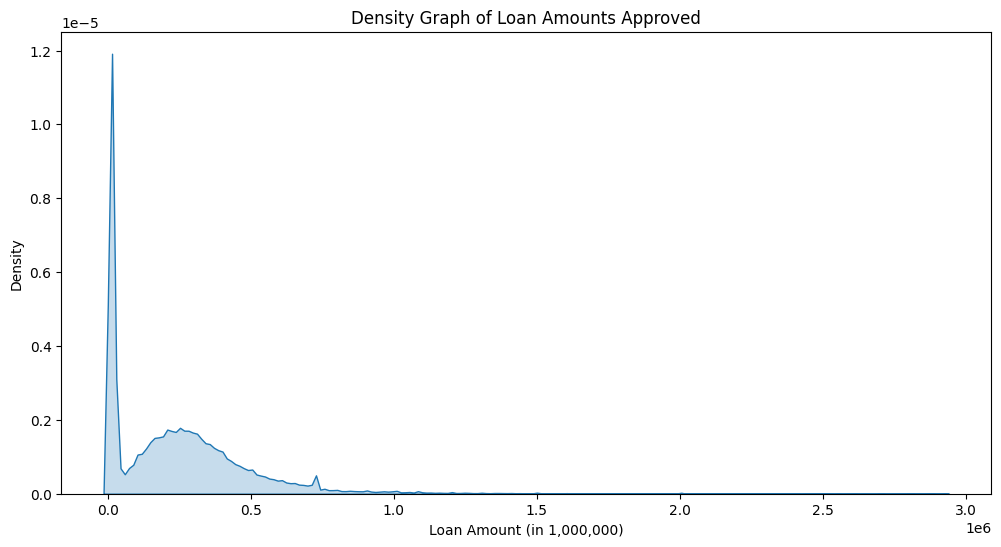

In [20]:
#Shows the number of loans approved according to loan amount
plt.figure(figsize=(12,6))
sns.kdeplot(accepted_loans['loan_amnt'], fill=True, bw_adjust=0.25)
plt.title("Density Graph of Loan Amounts Approved")
plt.xlabel("Loan Amount (in 1,000,000)")
plt.ylabel("Density")
plt.show()

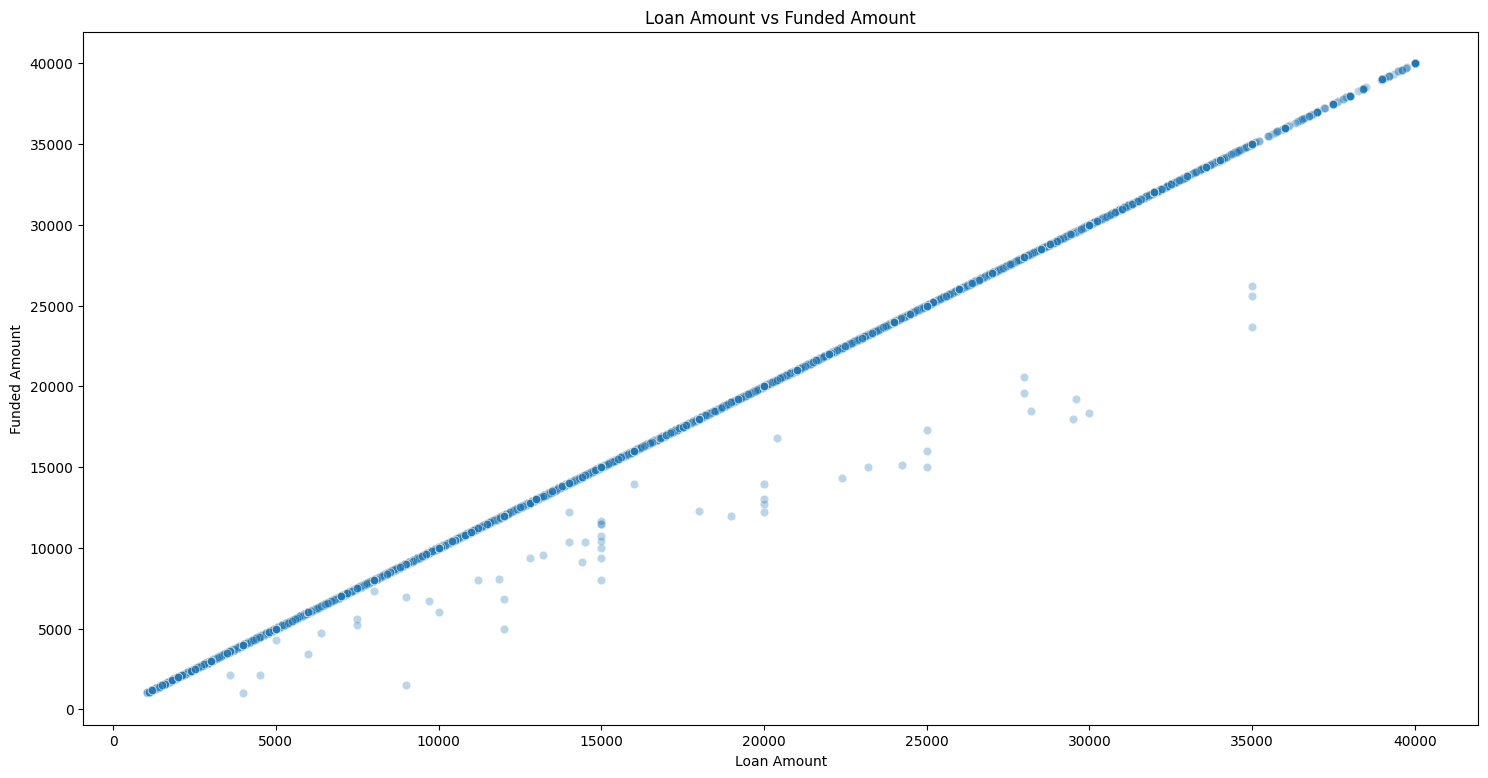

In [17]:
plt.figure(figsize=(18,9))

# Loan Amount vs Funded Amount
sns.scatterplot(data=accepted_loans, x='loan_amnt', y='funded_amnt', alpha=0.3)
plt.title('Loan Amount vs Funded Amount')
plt.xlabel("Loan Amount")
plt.ylabel("Funded Amount")
plt.show()

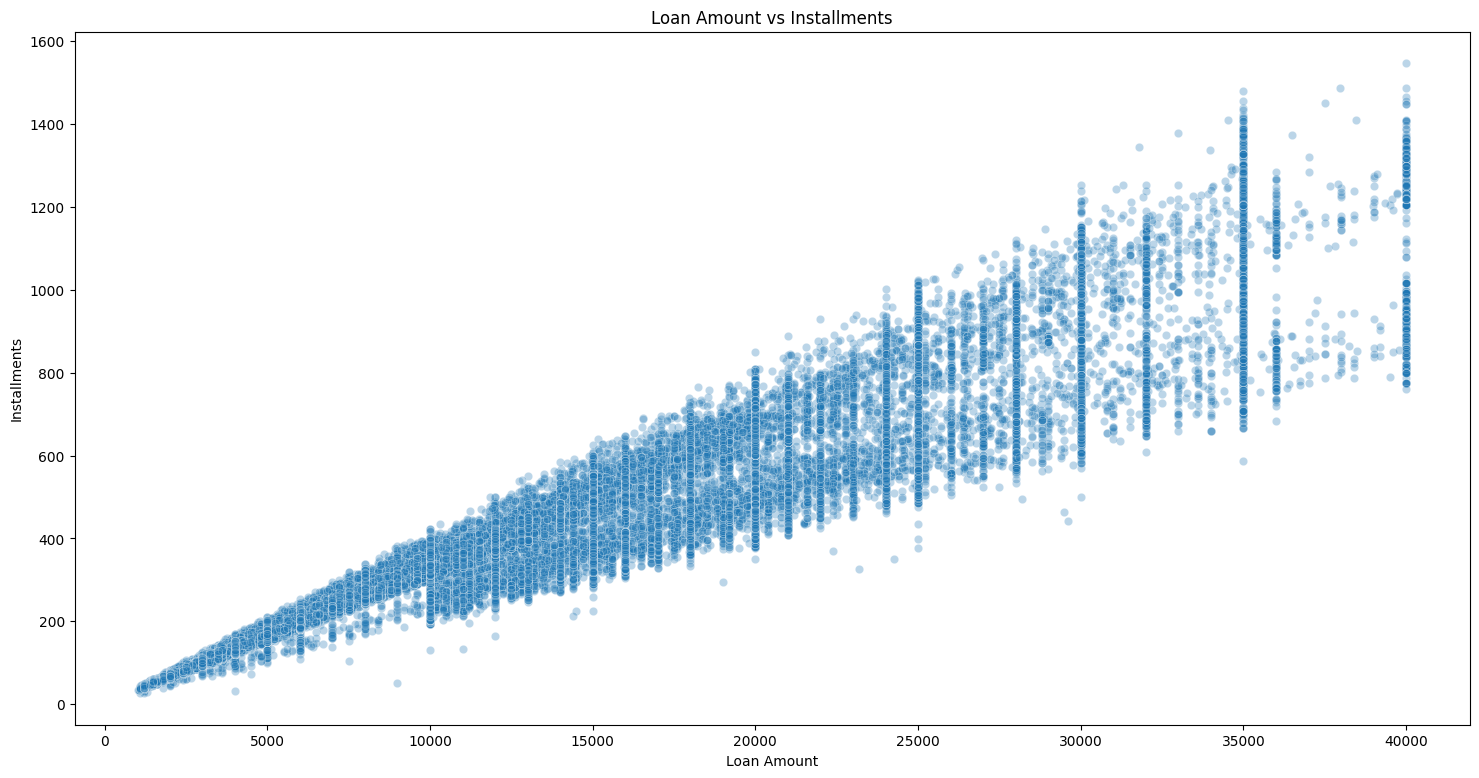

In [22]:
# Loan Amount vs Installment Amount
plt.figure(figsize=(18,9))
sns.scatterplot(data=accepted_loans, x='loan_amnt', y='installment', alpha=0.3)
plt.title('Loan Amount vs Installments')
plt.xlabel("Loan Amount")
plt.ylabel("Installments")
plt.show()

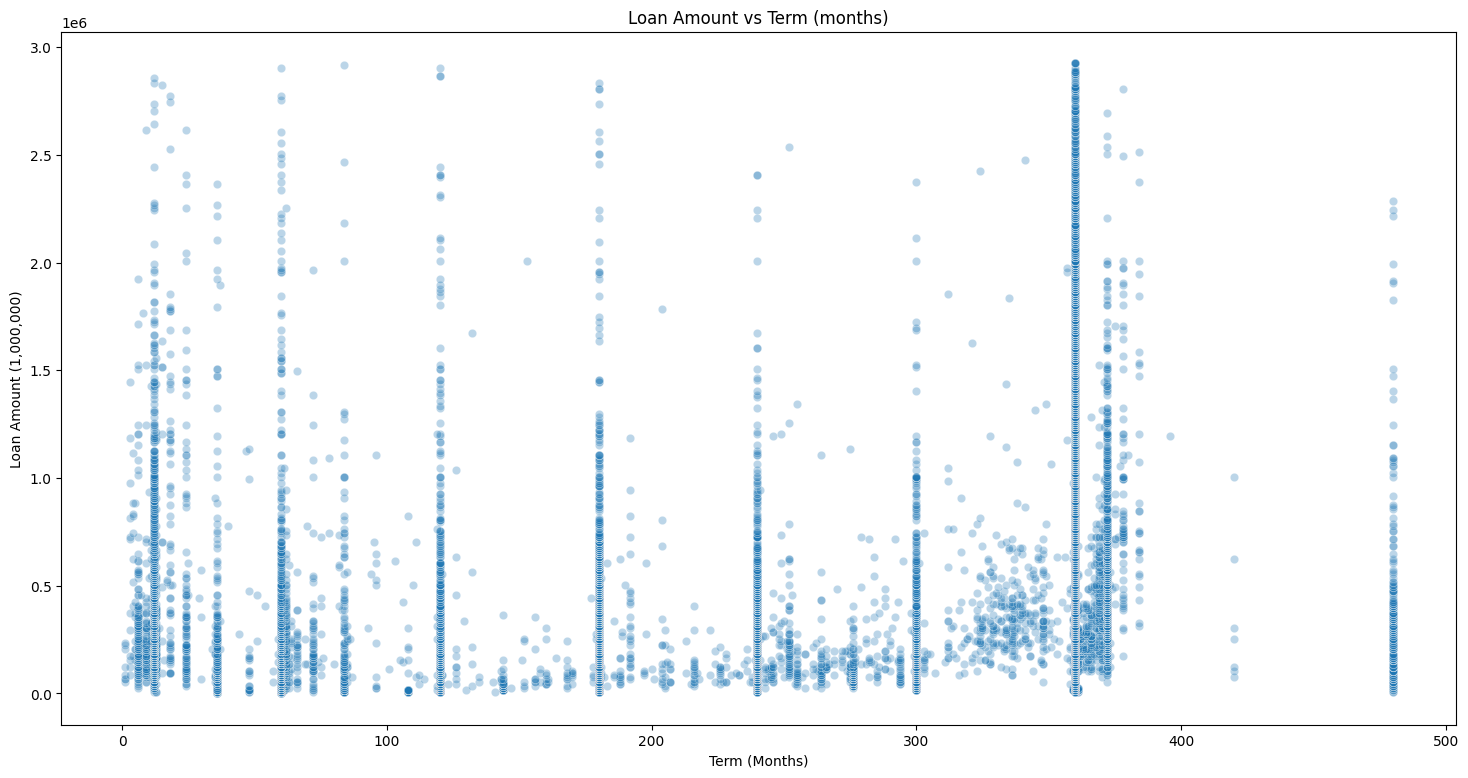

In [18]:
# Loan Amount vs Installment Amount
plt.figure(figsize=(18,9))
sns.scatterplot(data=accepted_loans, x='term_months', y='loan_amnt', alpha=0.3)
plt.title('Loan Amount vs Term (months)')
plt.xlabel("Term (Months)")
plt.ylabel("Loan Amount (1,000,000)")
plt.show()

281877


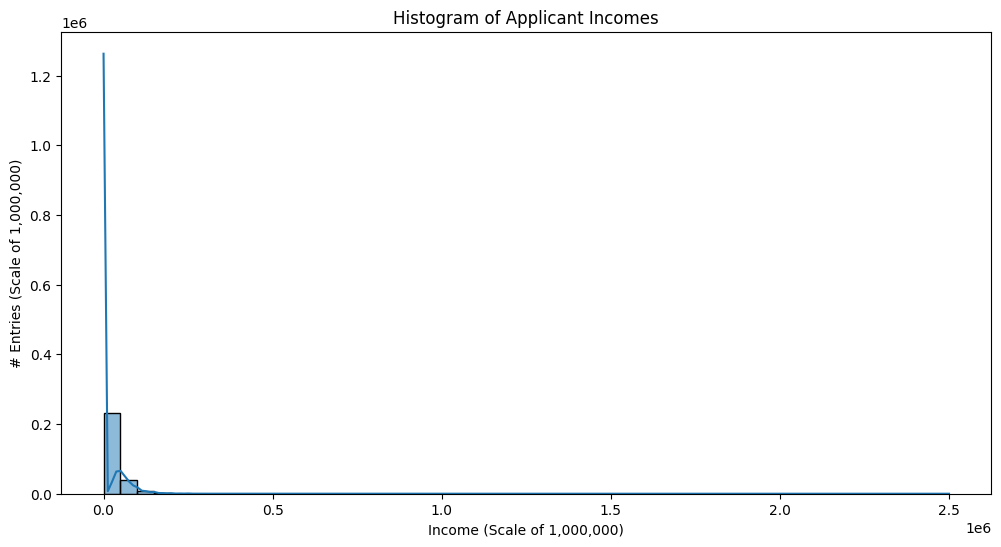

In [14]:
#Shows the number of loans approved according to loan amount
#accepted_loans = accepted_loans[accepted_loans['income'] <= 220000]

print(accepted_loans['income'].count())
plt.figure(figsize=(12,6))
sns.histplot(accepted_loans['income'], kde=True, bins=50)
plt.title("Histogram of Applicant Incomes")
plt.xlabel("Income (Scale of 1,000,000)")
plt.ylabel("# Entries (Scale of 1,000,000)")
plt.show()

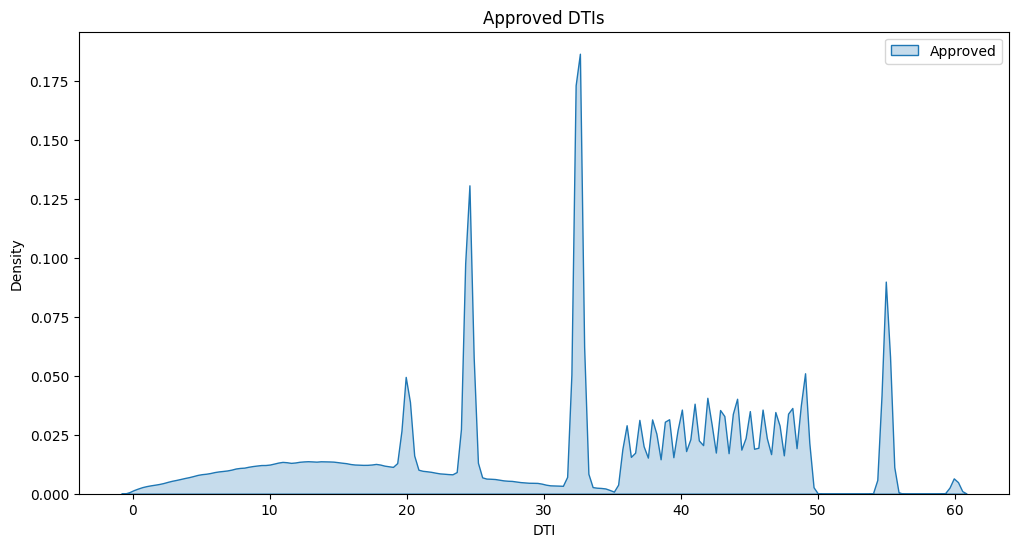

281877


In [19]:
#Shows the number of approved DTIs in the accepted and rejected data
plt.figure(figsize=(12,6))
sns.kdeplot(accepted_loans['dti'], label="Approved", fill=True, bw_adjust=0.25)
plt.title("Approved DTIs")
plt.xlabel("DTI")
plt.ylabel("Density")
plt.legend()
plt.show()

print(accepted_loans['dti'].count())

**Loan Amount VS Funded Amount**
- Almost all the loans are funded for the exact amount requested
- Both Loan amount and funded amount don't need to be used in the ML model, only one since the values are so close

**Loan Amount vs Installment**
- Installments scale with loan amount (expected)
- Loans are being issued under a specific set of terms

**DTI vs Term Length**
- DTI does not relate much to term length
- Most DTI levels have similar term lengths

**Histogram of Applicant Incomes**
- The graph shows that most of our entries fall under 500,000
- We will use the 99th percentile income cap to filter out extreme outliers

**Approved DTIs**
- This shows where the majority of the approved dti (debt-to-income) ratios fall into